# Noise Analysis

In [1]:
import pandas as pd
import numpy as np
from os import listdir, path

import matplotlib.pyplot as plt

import sys
#sys.path.append(path.abspath("../src/"))
#from parsingCTandMR import *

In [2]:
parsedCTdir = "../../data/parsed/CT/"

In [3]:
parsedsignals = [l for l in listdir(parsedCTdir) if "parsed" in l]
parsedsignals

['20210120_m4_l_parsed.csv',
 '20210120_m3_l_parsed.csv',
 '20210120_m4_r_parsed.csv',
 '20210120_m3_r_parsed.csv',
 '20210120_m2_r_parsed.csv',
 '20210120_m2_l_parsed.csv',
 '20210120_m1_l_parsed.csv',
 '20210120_m6_l_parsed.csv',
 '20210120_m1_r_parsed.csv',
 '20210120_m6_r_parsed.csv']

In [4]:
df = pd.read_csv(parsedCTdir + parsedsignals[1])
df

,CA1,CA2,CA3,CA4,CA5,ST1,SV1,ST2,SV2,ST3,...,SM4 std,SM5 std,SM6 std,SM7 std,SM8 std,CN1 std,CN2 std,CM1 std,CM2 std,time
0,-17.1286,352.366,781.216,517.716,338.883,173.236,127.6590,267.274,358.556,421.813,...,390.192,213.559,343.392,291.449,181.359,375.578,188.060,450.399,634.112,0
1,1922.9800,1436.980,1844.380,1423.110,946.821,356.309,257.7770,273.421,325.910,932.787,...,382.504,302.824,543.802,326.931,312.633,332.002,252.232,728.897,338.394,5
2,3737.5500,2690.670,2732.180,2020.540,1551.110,434.447,278.2120,527.043,162.976,613.789,...,318.552,353.290,346.494,279.472,260.175,310.892,431.775,392.563,437.481,10
3,3389.0400,2369.940,2270.390,2043.860,1409.670,567.787,273.1670,604.419,200.540,762.646,...,415.036,318.854,317.561,291.405,319.365,272.141,416.313,521.296,572.632,15
4,1858.4100,1254.970,1729.480,1625.220,992.525,673.696,480.9150,755.015,317.345,446.361,...,229.759,380.369,400.551,327.017,401.456,303.720,364.430,396.149,485.202,20
5,1581.7700,863.255,1523.980,1173.730,799.998,854.182,50.7074,702.357,254.215,469.213,...,345.418,282.489,302.470,230.528,206.757,302.371,386.251,727.202,528.345,25
6,1200.4000,1040.390,1379.530,1067.990,586.442,966.917,234.3730,619.979,255.572,563.378,...,321.017,276.910,274.258,252.131,370.294,431.590,374.789,535.577,538.800,30


In [5]:
allCT = pd.concat(
    [pd.read_csv(parsedCTdir + csv) for csv in parsedsignals]
)

In [6]:
allrois = [c for c in df.columns if 'std' not in c and 'time' not in c]
castrois = [c for c in allrois if 'CA' in c or 'ST' in c and int(c[-1]) < 6]
castroistds = [c + ' std' for c in castrois]
castrois
#roinames

['CA1', 'CA2', 'CA3', 'CA4', 'CA5', 'ST1', 'ST2', 'ST3', 'ST4', 'ST5']

In [37]:
signalvals = allCT[castrois].values.flatten()
stdvals = allCT[castroistds].values.flatten()

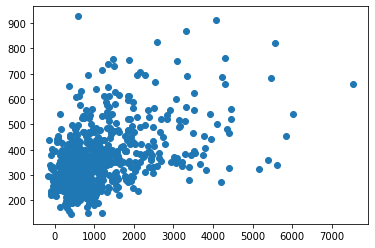

In [38]:
plt.scatter(signalvals, stdvals)

In [39]:
allrois = [c for c in df.columns if 'std' not in c and 'time' not in c]
carois = [c for c in allrois if 'CA' in c ]
caroistds = [c + ' std' for c in carois]
carois
#roinames

['CA1', 'CA2', 'CA3', 'CA4', 'CA5']

In [40]:
signalvals = allCT[carois].values.flatten()
stdvals = allCT[caroistds].values.flatten()

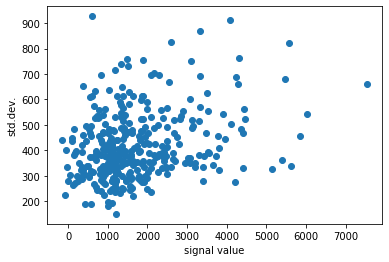

In [46]:
plt.scatter(signalvals, stdvals)
plt.xlabel("signal value")
plt.ylabel("std.dev.")
plt.savefig("./CA rois signal vs stddev.png")

In [20]:
allstds = allCT[castroistds].values.flatten()

In [21]:
sum((233 < allstds) * (allstds < 433)) / len(allstds)

0.7142857142857143

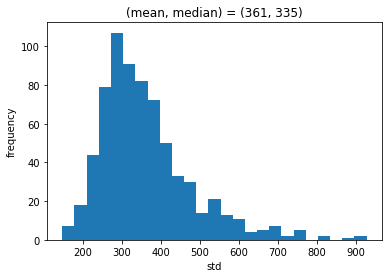

In [22]:
allstds = allCT[castroistds].values.flatten()
allstdmean = int(np.round(np.mean(allstds), 0))
allstdsmedian = int(np.round(np.median(allstds), 0))

plt.hist(allstds, bins=25)
plt.title(f'(mean, median) = ({allstdmean}, {allstdsmedian})')
plt.xlabel("std")
plt.ylabel("frequency")

plt.savefig("./relevant ROIs std histogram.png")

plt.show()

In [23]:
from scipy.stats import shapiro, kstest

In [24]:
shapiro(np.log(allstds))

(0.9893350005149841, 5.693902858183719e-05)

In [25]:
shapiro(allstds)

(0.9054936170578003, 2.123390080764668e-20)

In [26]:
kstest(np.log(allstds), 'norm')

KstestResult(statistic=0.9999996994675451, pvalue=0.0)

In [27]:
kstest(allstds, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

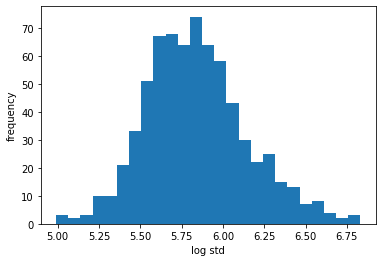

In [28]:

plt.hist(np.log(allstds), bins=25)
plt.xlabel("log std")
plt.ylabel("frequency")

plt.savefig("./relevant ROIs std histogram.png")

plt.show()

In [29]:
def plotsignalwithstds(df, castrois, ax1=None, ax2=None, title=""):
    castroistds = [c + ' std' for c in castrois]
    stdmean = df[castroistds].values.mean()

    if ax1 is None:
        fig, axes = plt.subplots(1, 2, figsize=(2.5 * 6.4, 0.9 * 4.8))
        ax1, ax2 = axes

    ax1.hist(df[castroistds].values.flatten())# bins=30)
    ax1.set_xlabel("std")
    ax1.set_ylabel("frequency")

    for roiname in castrois:
        ax2.scatter(
            df[roiname],
            df[roiname + " std"],
            #color="black",
            alpha=0.75,
            label=roiname,
        )

    ax2.plot([0, 3500], [stdmean, stdmean], color="black", label="mean")
    ax2.legend()
    ax2.set_ylabel("ROI std")
    ax2.set_xlabel("signals")
    
    return None

In [30]:
stdmeans = []
for csvfile in parsedsignals:
    df = pd.read_csv(parsedCTdir + csvfile)
    stdmeans += [df[castroistds].values.flatten().mean()]

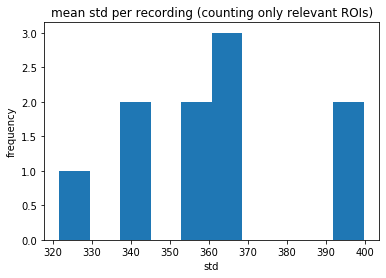

In [31]:
plt.hist(stdmeans)
plt.xlabel("std")
plt.ylabel("frequency")
plt.title("mean std per recording (counting only relevant ROIs)")
plt.show()

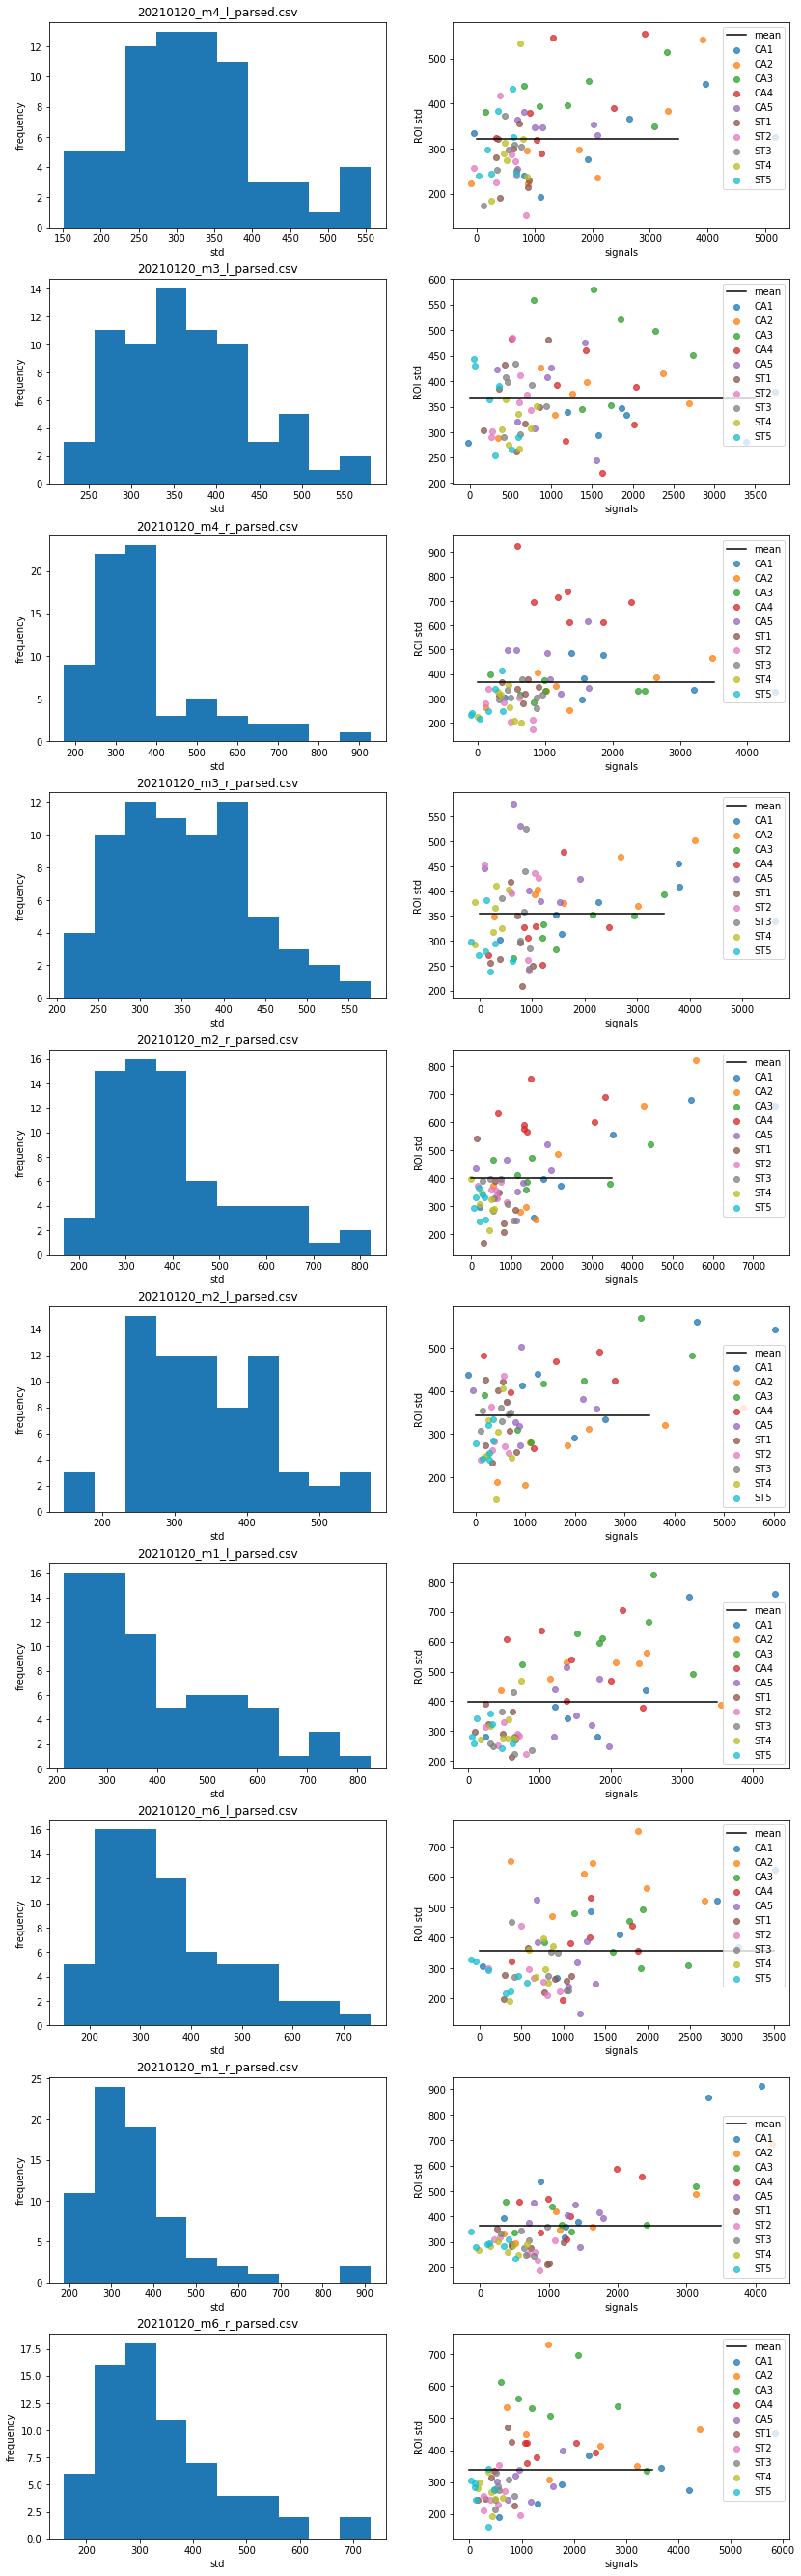

In [32]:
nrows = len(parsedsignals)

fig, axes = plt.subplots(nrows, 2, figsize=(2.15 * 6.4, nrows * 4.8))

for i, csvfile in enumerate(parsedsignals):
    df = pd.read_csv(parsedCTdir + csvfile)
    
    ax1, ax2 = axes[i, 0], axes[i, 1]
    fig = plotsignalwithstds(df, castrois, ax1, ax2)
    ax1.set_title(csvfile)

plt.subplots_adjust(hspace=0.25)
plt.savefig("./CT signal noise.png", bbox_inches='tight')